<a href="https://colab.research.google.com/github/AkshRanjan/Machine-Learning/blob/main/Copy_of_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
N = 10000
d = 10
ads_selected = []
numbers_of_reward_1 = [0] * d
numbers_of_reward_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_reward_1[i]+1, numbers_of_reward_0[i]+1)
    if(random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_reward_1[ad] = numbers_of_reward_1[ad] + 1
  else:
    numbers_of_reward_0[ad] = numbers_of_reward_0[ad] + 1
    total_reward = total_reward + reward


## Visualising the results - Histogram

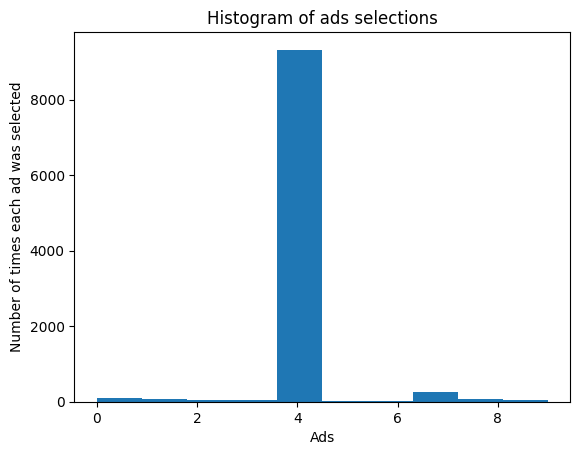

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()